In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spam-email-dataset/emails.csv


In [2]:
df = pd.read_csv("/kaggle/input/spam-email-dataset/emails.csv")
df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [3]:
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [4]:
df.columns

Index(['text', 'spam'], dtype='object')

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score,classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.naive_bayes import MultinomialNB

In [6]:
def transformText(text):
    text = text.lower()
    words = word_tokenize(text)
    words = [word for word in words if word.isalpha() and word not in stopwords.words('english')]
    return ' '.join(words)


In [7]:
# transformText(df['text'][0])

In [8]:
# Preprocess the text 

# class PreprocessText(BaseEstimator, TransformerMixin):
#     def fit(self,X,y=None):
#         return self
    
#     def transform(self,X):
#         X['processed_text'] = X['text'].apply(transformText)
        
#         return X
    
# class VectorizeText(BaseEstimator, TransformerMixin):
#     cv = CountVectorizer()

#     def fit(self,X,y=None):
#         cv.fit(X['processed_text'])
#         return self
    
#     def transform(self,X):
#         temp = cv.transform(X['processed_text']).toarray()
#         X['processed_text'] = temp
#         return X

In [9]:
# preprocessText = PreprocessText()
# vectorizeText = VectorizeText()

In [10]:
# pipe = Pipeline([
#     ("preprocessor", preprocessText),
#     ("vectorizer",vectorizeText)
# ])

# new_df = pipe.fit_transform(df)

# X = new_df['processed_text']
# y = new_df['spam']

In [12]:
df['processed_text'] = df['text'].apply(transformText)


In [14]:
cv = CountVectorizer()
X = cv.fit_transform(df['processed_text'])
y = df['spam']


In [15]:
X = X.toarray()

In [ ]:
X

In [16]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [17]:
# Build and train the model
model =  MultinomialNB()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print(classification_report(y_test, predictions))

Accuracy: 0.99
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       856
           1       0.98      0.99      0.98       290

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



In [18]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

2024-02-08 09:28:12.178196: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-08 09:28:12.178335: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-08 09:28:12.349183: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [19]:
model = Sequential([
    Dense(256,activation="relu"),
    Dense(64,activation="relu"),
    Dense(1,activation="sigmoid"),
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [20]:
model.fit(X_train,y_train, epochs=10, batch_size=32)

Epoch 1/10
144/144 [==============================] - 16s 104ms/step - loss: 0.0994 - accuracy: 0.9666
Epoch 2/10
144/144 [==============================] - 15s 107ms/step - loss: 0.0132 - accuracy: 0.9987
Epoch 3/10
144/144 [==============================] - 15s 103ms/step - loss: 0.0068 - accuracy: 0.9991
Epoch 4/10
144/144 [==============================] - 15s 105ms/step - loss: 6.1864e-04 - accuracy: 1.0000
Epoch 5/10
144/144 [==============================] - 15s 102ms/step - loss: 2.7678e-04 - accuracy: 1.0000
Epoch 6/10
144/144 [==============================] - 15s 103ms/step - loss: 1.5477e-04 - accuracy: 1.0000
Epoch 7/10
144/144 [==============================] - 15s 107ms/step - loss: 9.5658e-05 - accuracy: 1.0000
Epoch 8/10
144/144 [==============================] - 15s 105ms/step - loss: 6.3096e-05 - accuracy: 1.0000
Epoch 9/10
144/144 [==============================] - 15s 106ms/step - loss: 4.4768e-05 - accuracy: 1.0000
Epoch 10/10
144/144 [============================

In [21]:
nnpredictions = model.predict(X_test)
# print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

36/36 [==============================] - 1s 17ms/step


In [27]:
pred = [ 1 if i >= 0.5 else 0 for i in nnpredictions ]

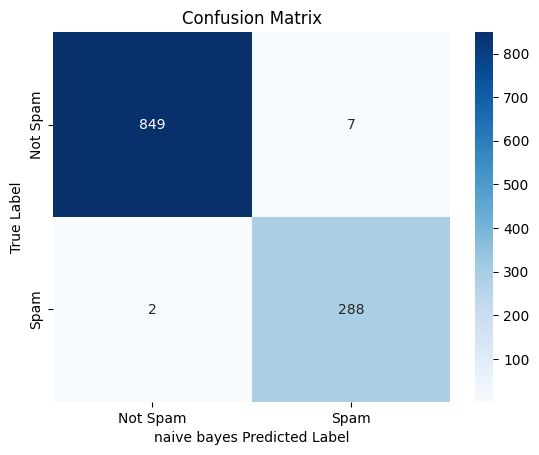

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('naive bayes Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

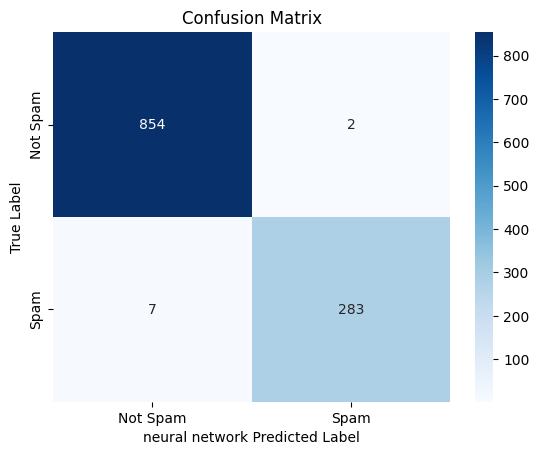

In [28]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('neural network Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()